# **Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.**
Perform following tasks:
1. Preprocess the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2,Rmse,etc.

In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [426]:
#importing the dataset
df= pd.read_csv('/content/uber.csv')

In [427]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [428]:
df.shape

(200000, 9)

In [429]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [430]:
#to drop unnamed column as it isnt required
df=df.drop(['Unnamed: 0','key'],axis=1)

In [431]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [432]:
df.dtypes #To get the the of each column

,0
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [434]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


Filling Missing Values

In [435]:
df.isnull()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False


In [436]:
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [437]:
df.isnull().sum().sum()

2

In [438]:
df['dropoff_latitude'] = df['dropoff_latitude'].fillna(df['dropoff_latitude'].mean())
df['dropoff_longitude'] = df['dropoff_longitude'].fillna(df['dropoff_longitude'].mean())

In [439]:
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [440]:
df.dtypes

,0
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


Column pickup_datetime is in wrong format .convert it to DateTime Format

In [441]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime,errors='coerce',utc=True)

In [442]:
df.dtypes

,0
fare_amount,float64
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [443]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


To Segregate each time of date and time

In [444]:
df=df.assign(hour =df.pickup_datetime.dt.hour,
             day=df.pickup_datetime.dt.day,
             month=df.pickup_datetime.dt.month,
             year=df.pickup_datetime.dt.year,
             dayofweek=df.pickup_datetime.dt.dayofweek,
             dayName=df.pickup_datetime.dt.day_name()
             )

**OR**

In [445]:
#only series datatype has the dt attribute
df['hour']=df['pickup_datetime'].dt.hour
df['day']=df['pickup_datetime'].dt.day
df['month']=df['pickup_datetime'].dt.month
df['year']=df['pickup_datetime'].dt.year
df['dayofweek']=df['pickup_datetime'].dt.dayofweek

In [446]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dayName
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,Thursday
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,Friday
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,Monday
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,Friday
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,Thursday


In [447]:
df.describe()#only for Quantative columns

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,13.491335,15.704670,6.281795,2011.742440,3.048425
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997,6.515531,8.687409,3.438925,1.856397,1.946946
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000,2015.000000,6.000000


In [448]:
x=df['fare_amount'].value_counts()
#list(series) # counts are sorted in descending order ie 1st count is ma count

In [449]:
print(type(x))
print("Max count =",x[6.50])
x

<class 'pandas.core.series.Series'>
Max count = 9684


,count
fare_amount,
6.50,9684
4.50,8247
8.50,7521
5.70,5858
5.30,5838
...,...
140.25,1
190.00,1
45.16,1


In [450]:
#drop the column pickup_datetime using drop()
#'axis=1' drops the specified column
df=df.drop('pickup_datetime',axis=1)

In [451]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dayName
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,Thursday
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,Friday
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,Monday
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,Friday
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,Thursday


In [452]:
df.dtypes

,0
fare_amount,float64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
hour,int32
day,int32
month,int32
year,int32


In [453]:
df.drop(["dayName"],axis=1,inplace=True)

Checking outliers and filling them

In [454]:
number_of_columns=len(df.columns)

In [455]:
number_of_columns

11

# Number of columns is 12(11 quantitative and 1 categorical),but in the following box plot only 11 subplots are visible.
This is because boxplots are only for quantitativealued columnsand not for categorical valued columns.

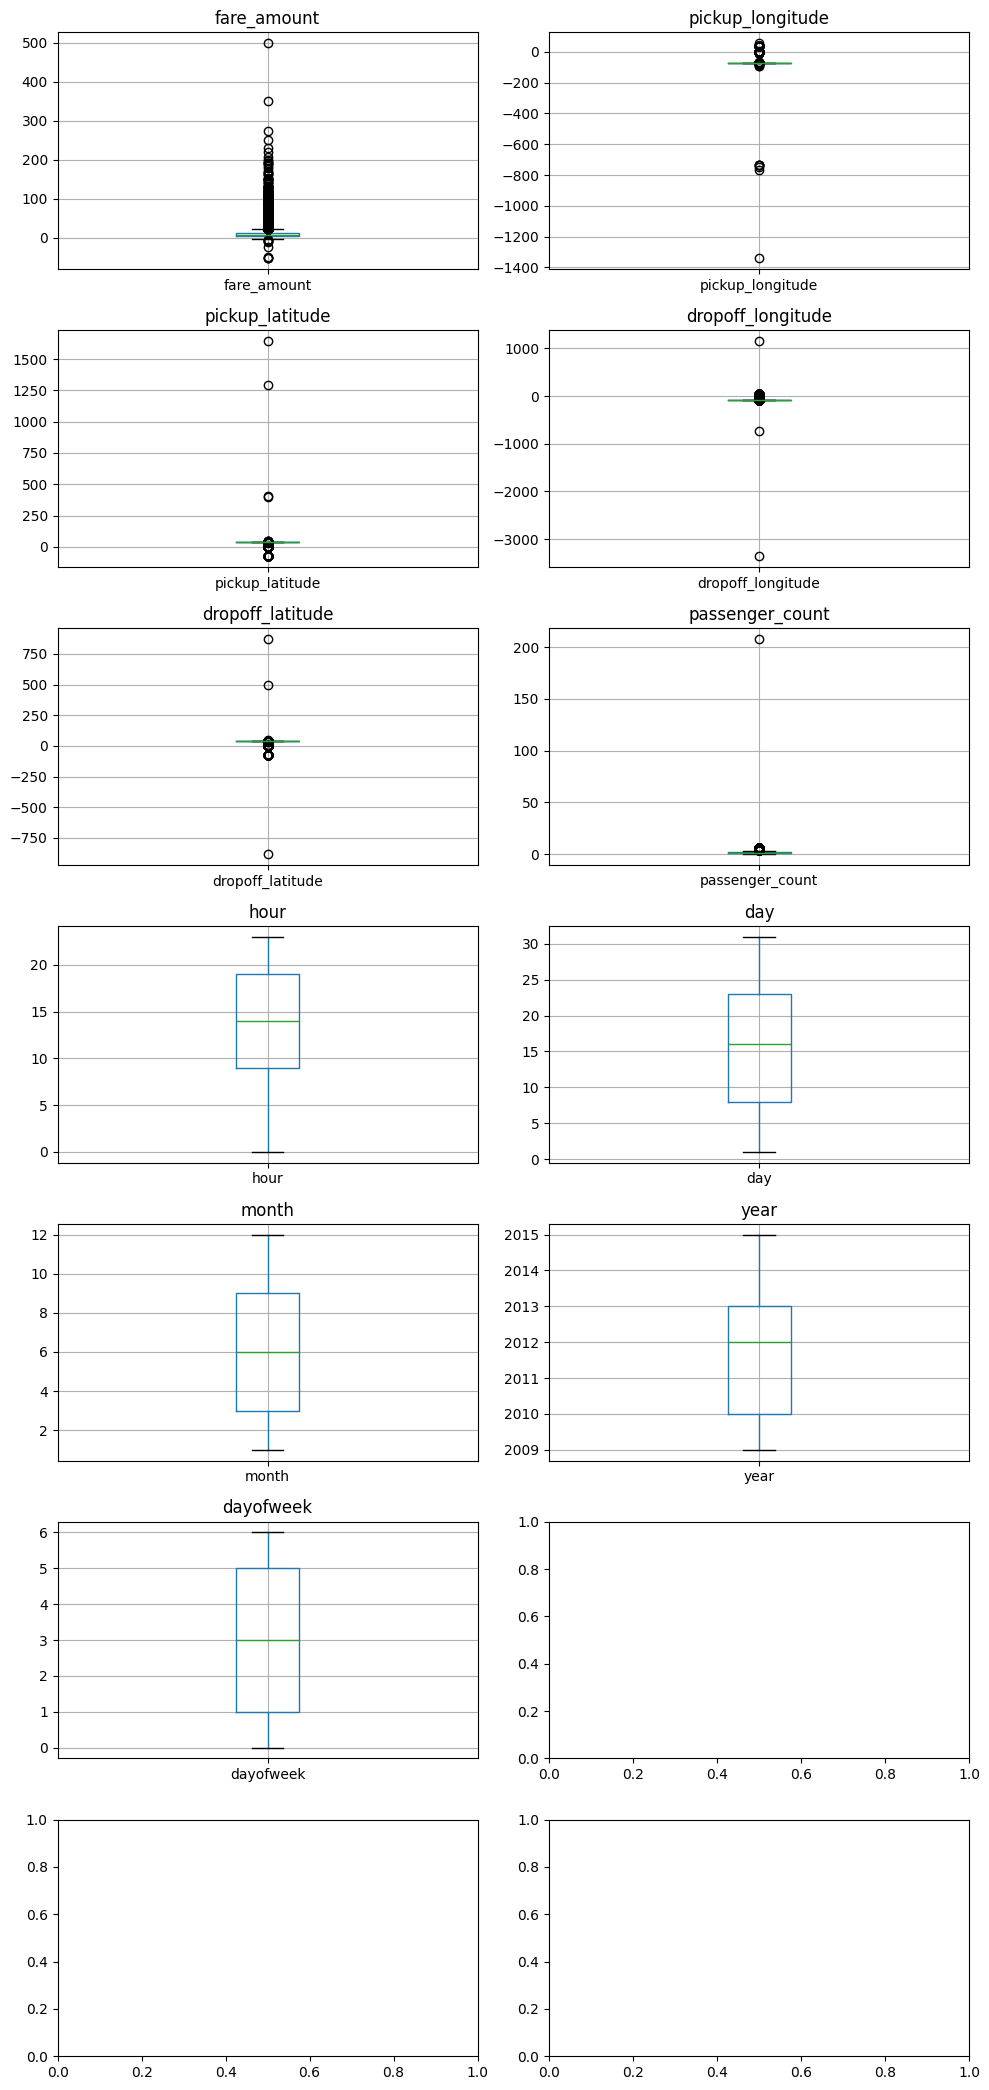

In [456]:
#boxplot for outliers
number_of_rows = 7
number_of_columns = 2

# Calculate figsize based on number of rows and columns
figsize = (number_of_columns * 5, number_of_rows * 3)  # Adjust scaling factor as needed

# If you want to create individual box plots for each column:
fig, axes = plt.subplots(number_of_rows, number_of_columns, figsize=figsize) # Create subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through columns and create box plots
for i, col in enumerate(df.columns):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col) # Set title for each subplot

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Alternatively, if you want to group by a specific column:
# df.boxplot(column='column_name_to_plot', by='column_name_to_group_by', layout=(7, 2), figsize=(15, 20))

Conclusion:Number of spaces for subplots generated can be >= actual number of subplots of the quantitative columns)but not < the actual number of subplots.

# Explanation of Clip Function.

In [457]:
a = np.arange(10,100,10)#consider from 10 to 99 with step size of 10
a1 =np.clip(a,30,60)    #np.clip(list,lowerlimit,upperlimit)

print("Befor Clipping:",a)
print("After Clipping:",a1)

Befor Clipping: [10 20 30 40 50 60 70 80 90]
After Clipping: [30 30 30 40 50 60 60 60 60]


In [458]:
from re import L
#Elimination of Outliers
#using the InterQuartile Range to fill the values

def remove_outliers(df, column_name):
    # Using df instead of df1
    Q1 = df[column_name].quantile(0.25)
    Q2 = df[column_name].quantile(0.50)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    print(".......*****************************************************......")
    print("col=",column_name,"Q1=",Q1,"Q2=",Q2,"Q3=",Q3) # Using column_name instead of col
    print(".......*****************************************************......")
    # Using df instead of df1 and column_name instead of col
    df[column_name]=np.clip(df[column_name],lower_whisker,upper_whisker)
    return df

def treat_outliers_all(df,col_list):
  print("col_list",col_list)
  for c in col_list:
      # Passing c (current column name) to remove_outliers
      df = remove_outliers(df, c)
  return df

In [459]:
df = treat_outliers_all(df , df.columns)

col_list Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek'],
      dtype='object')
.......*****************************************************......
col= fare_amount Q1= 6.0 Q2= 8.5 Q3= 12.5
.......*****************************************************......
.......*****************************************************......
col= pickup_longitude Q1= -73.992065 Q2= -73.98182299999999 Q3= -73.96715350000001
.......*****************************************************......
.......*****************************************************......
col= pickup_latitude Q1= 40.73479575 Q2= 40.752592 Q3= 40.767158
.......*****************************************************......
.......*****************************************************......
col= dropoff_longitude Q1= -73.991407 Q2= -73.98009300000001 Q3= -73.963658
.......**********************************************

,0
fare_amount,"Axes(0.125,0.786098;0.352273x0.0939024)"
pickup_longitude,"Axes(0.547727,0.786098;0.352273x0.0939024)"
pickup_latitude,"Axes(0.125,0.673415;0.352273x0.0939024)"
dropoff_longitude,"Axes(0.547727,0.673415;0.352273x0.0939024)"
dropoff_latitude,"Axes(0.125,0.560732;0.352273x0.0939024)"
passenger_count,"Axes(0.547727,0.560732;0.352273x0.0939024)"
hour,"Axes(0.125,0.448049;0.352273x0.0939024)"
day,"Axes(0.547727,0.448049;0.352273x0.0939024)"
month,"Axes(0.125,0.335366;0.352273x0.0939024)"
year,"Axes(0.547727,0.335366;0.352273x0.0939024)"


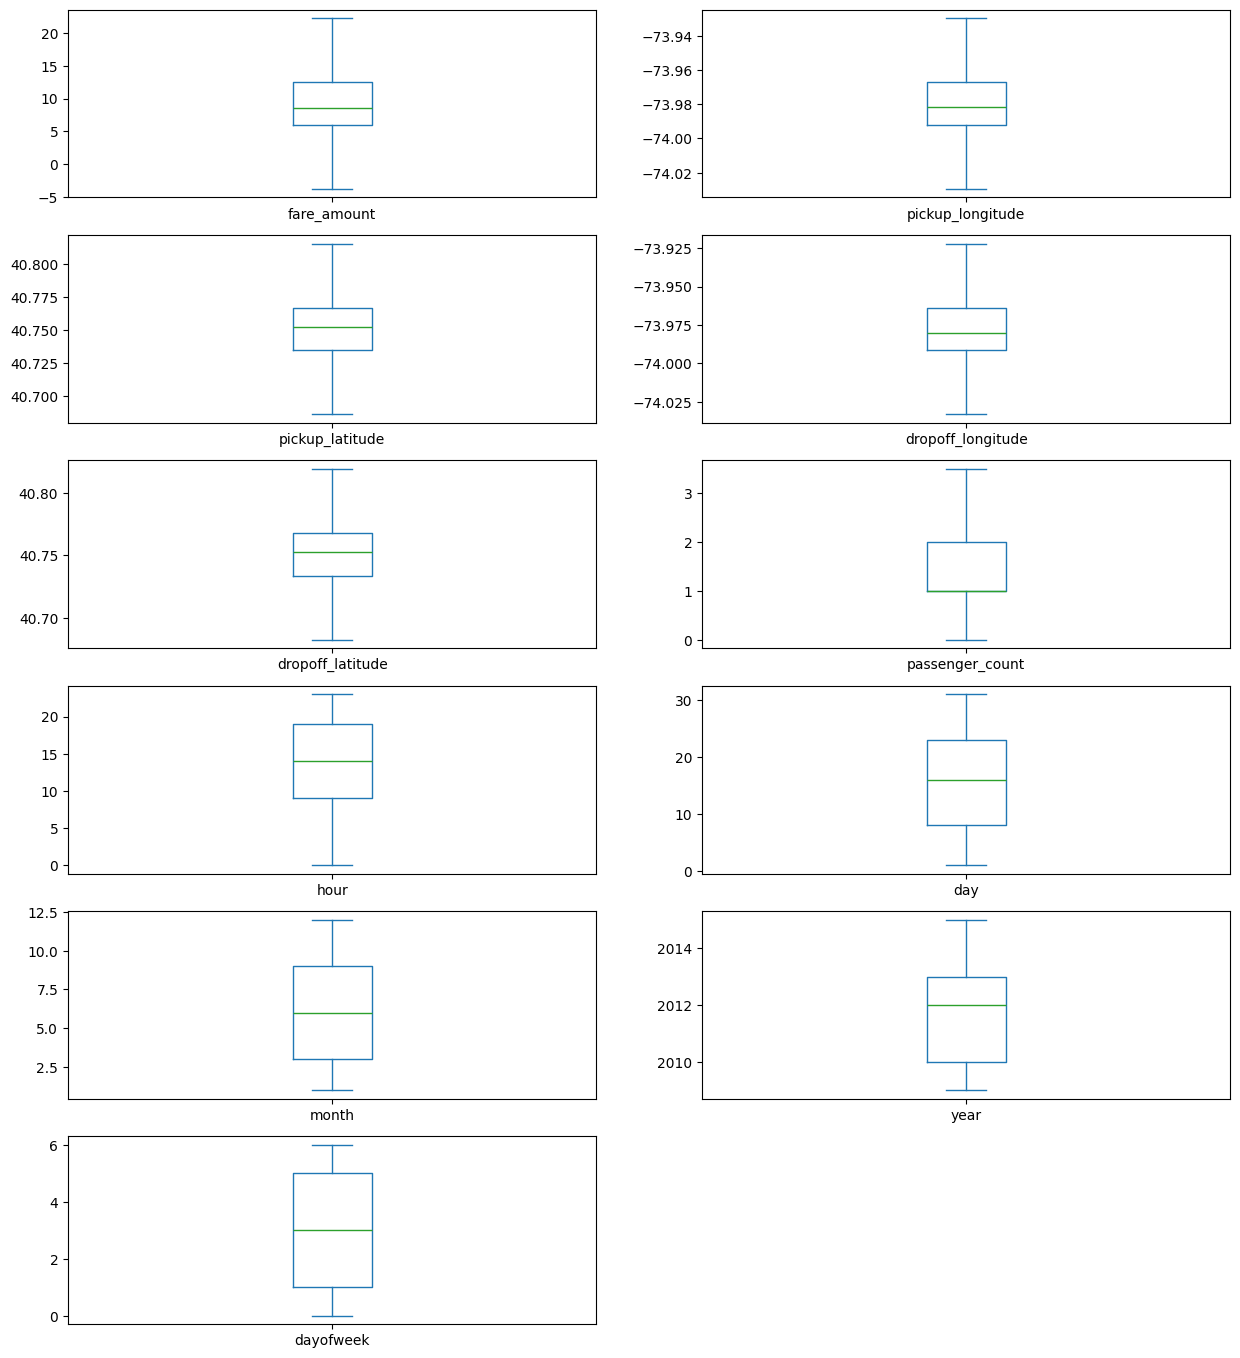

In [460]:
df.plot(kind = "box",subplots=True,layout=(7,2),figsize=(15,20))#boxplot shows that the datset is free from outliers

In [461]:
#Finding incorrect latitude(less than -90  or greater than 90 and longitude(greater than180 or less than -180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) | (df.pickup_latitude < 90) |
                               (df.dropoff_latitude > 90) | (df.dropoff_latitude < -90) |
                               (df.pickup_longitude > 180) | (df.pickup_longitude< -180) |
                               (df.dropoff_longitude > 90) | (df.dropoff_longitude < -90)
                               ]

In [462]:
incorrect_coordinates

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4
4,16.00,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,10,28,10,2012,6
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4
199997,22.25,-73.986017,40.756487,-73.922034,40.692588,2.0,0,29,6,2009,0
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,14,20,5,2015,2


In [463]:
df.drop(incorrect_coordinates,inplace =True, errors = 'ignore')

In [464]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4
4,16.00,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,10,28,10,2012,6
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4
199997,22.25,-73.986017,40.756487,-73.922034,40.692588,2.0,0,29,6,2009,0
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,14,20,5,2015,2


In [465]:
!pip install haversine

In [466]:
import haversine as hs #calculating the distance usig haversine to claculate the distance between 2 points. can't use euclidian as it is for flat surface
travel_dist = []
for pos in range(len(df['pickup_latitude'])):
  long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
  loc1 = (lati1,long1)
  loc2 = (lati2,long2)
  c = hs.haversine(loc1,loc2)
  travel_dist.append(c)

# Move the assignment outside the loop
df['dist_travel_km'] = travel_dist
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [467]:
#uber doesnt travel over 130 kms so minimize the distance
df = df[(df.dist_travel_km >= 1) & (df.dist_travel_km <= 130)] # Corrected the typo and used <= for less than or equal to
print("Remaining observations in the dataset:",df.shape)

Remaining observations in the dataset: (163040, 12)


In [468]:
bool_df = df.isnull()

In [469]:
bool_df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
199994,False,False,False,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

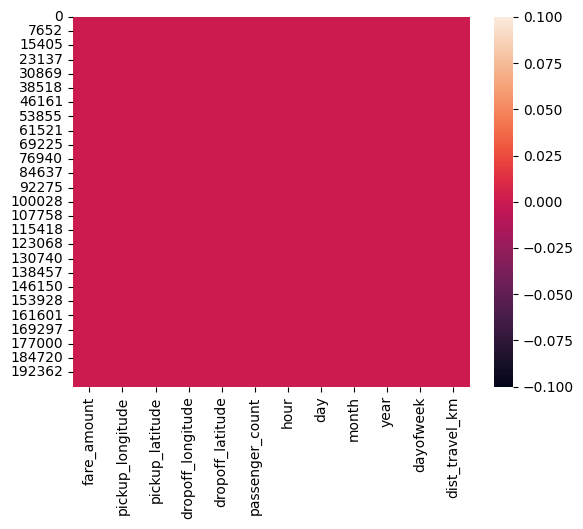

In [470]:
sns.heatmap(bool_df)#Free of null values , no correlation exists since r=0 (false is a constant value which is not related to the index of each row in the df)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

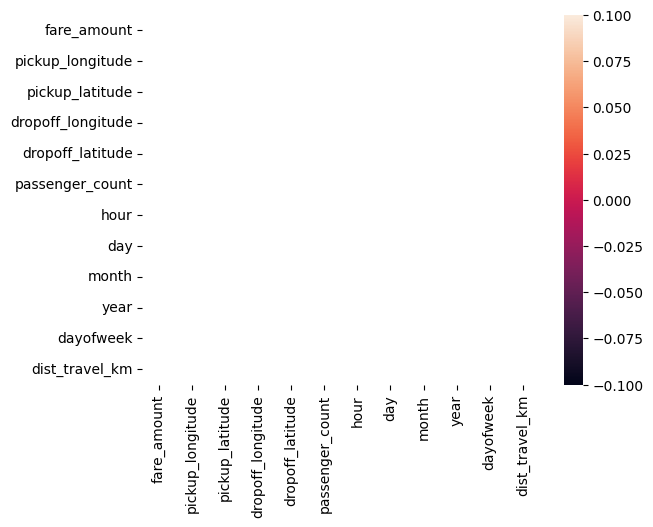

In [471]:
sns.heatmap(bool_df.corr())

In [472]:
corr = df.corr() #Function to find the correlation

In [473]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.193177,-0.119469,0.258616,-0.137745,0.015056,-0.029760,0.001607,0.031339,0.161861,0.009264,0.798927
pickup_longitude,0.193177,1.000000,0.425309,0.241587,0.169203,-0.012892,0.013057,-0.004459,0.000863,0.014862,-0.028392,0.130003
pickup_latitude,-0.119469,0.425309,1.000000,0.148775,0.358836,-0.016186,0.031484,0.002907,0.001627,-0.016172,-0.044618,-0.143530
dropoff_longitude,0.258616,0.241587,0.148775,1.000000,0.401698,-0.008670,-0.059730,-0.005912,0.002404,0.015657,-0.002164,0.247271
dropoff_latitude,-0.137745,0.169203,0.358836,0.401698,1.000000,-0.007419,0.019775,-0.000130,-0.001663,-0.010472,-0.031153,-0.111577
passenger_count,0.015056,-0.012892,-0.016186,-0.008670,-0.007419,1.000000,0.020203,0.002730,0.009936,-0.007765,0.047728,0.007754
hour,-0.029760,0.013057,0.031484,-0.059730,0.019775,0.020203,1.000000,0.005447,-0.002887,0.002574,-0.090975,-0.047252
day,0.001607,-0.004459,0.002907,-0.005912,-0.000130,0.002730,0.005447,1.000000,-0.017113,-0.011725,0.005673,0.001019
month,0.031339,0.000863,0.001627,0.002404,-0.001663,0.009936,-0.002887,-0.017113,1.000000,-0.113429,-0.010483,0.008433
year,0.161861,0.014862,-0.016172,0.015657,-0.010472,-0.007765,0.002574,-0.011725,-0.113429,1.000000,0.006522,0.020138


<Axes: >

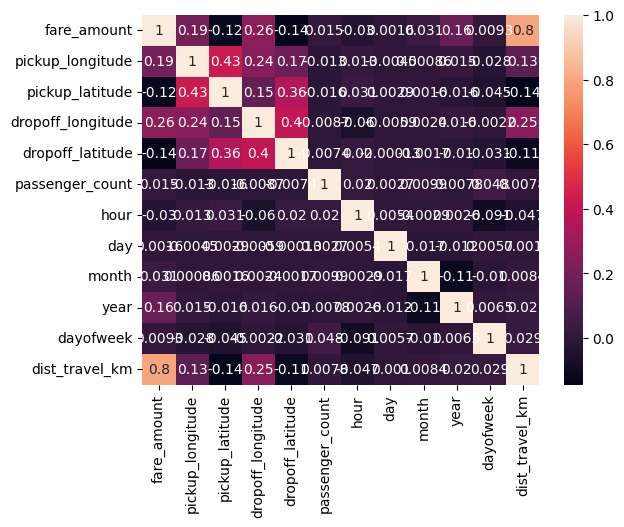

In [474]:
sns.heatmap(df.corr(),annot=True)#Correlation heat map (light map means highly correlated)

# **Dividing the Dataset into Feature and Target values.**

In [475]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek', 'dist_travel_km'],
      dtype='object')

In [476]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]

# **OR,Since all columns except "fare amount" are the features,the following can be done instead.**

In [477]:
x=df[df.columns[1:]]#since 0th column is fare_amount
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088
...,...,...,...,...,...,...,...,...,...,...,...
199994,-73.983070,40.760770,-73.972972,40.754177,1.0,14,31,1,2014,4,1.122879
199996,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4,1.875053
199997,-73.986017,40.756487,-73.922034,40.692588,2.0,0,29,6,2009,0,8.919418
199998,-73.997124,40.725452,-73.983215,40.695415,1.0,14,20,5,2015,2,3.539720


In [478]:
y=df['fare_amount']
y

,fare_amount
0,7.50
1,7.70
2,12.90
3,5.30
4,16.00
...,...
199994,12.00
199996,7.50
199997,22.25
199998,14.50


# **Dividing the datset into training and testing dataset.**

In [479]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.70,random_state=7)#30% for training ,70% for testing/evaluation
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
85111,-73.979022,40.777218,-74.006340,40.739864,3.0,21,27,11,2010,5,4.748305
134870,-74.001322,40.731158,-74.008248,40.743092,1.0,16,7,5,2013,1,1.449640
82644,-73.985282,40.751895,-73.977094,40.765192,3.0,14,3,1,2009,5,1.631489
110503,-73.965110,40.764404,-73.972360,40.753432,1.0,16,18,10,2010,0,1.364317
95194,-73.988655,40.737095,-74.003300,40.732762,1.0,20,25,2,2013,0,1.324667
...,...,...,...,...,...,...,...,...,...,...,...
81555,-73.983937,40.773500,-73.996047,40.750557,3.5,18,21,9,2013,5,2.747475
65586,-73.929786,40.773702,-73.922034,40.692712,3.5,19,20,9,2011,1,9.029344
13187,-73.971954,40.782089,-73.957771,40.774437,3.5,1,19,4,2015,6,1.466364
60932,-73.968068,40.799880,-73.984100,40.749037,3.5,14,18,12,2010,5,5.812440


In [480]:
X_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
4601,-73.980368,40.745082,-73.965373,40.756930,3.5,23,16,5,2011,0,1.825137
16992,-73.971989,40.750650,-73.922034,40.722312,2.0,0,14,2,2011,0,5.257748
22135,-73.988637,40.737163,-73.990168,40.748987,2.0,12,6,12,2011,1,1.321082
143093,-73.979542,40.781737,-73.982103,40.752105,2.0,9,25,8,2010,2,3.301984
42087,-74.000102,40.761207,-73.991612,40.751532,1.0,7,23,12,2010,3,1.291802
...,...,...,...,...,...,...,...,...,...,...,...
43618,-73.979320,40.749995,-74.033030,40.687721,1.0,14,15,12,2009,1,8.272803
14485,-73.950343,40.783722,-73.968238,40.796972,1.0,8,6,1,2013,6,2.107203
154067,-74.003772,40.748191,-73.966122,40.768755,1.0,16,13,5,2009,2,3.909568
26162,-73.983575,40.765592,-73.983882,40.780910,1.0,17,30,10,2013,2,1.703482


In [481]:
y_train

,fare_amount
85111,10.1
134870,6.5
82644,4.9
110503,5.7
95194,7.0
...,...
81555,8.5
65586,19.7
13187,5.5
60932,17.3


In [482]:
y_test

,fare_amount
4601,6.50
16992,22.25
22135,7.30
143093,12.10
42087,5.30
...,...
43618,22.25
14485,8.00
154067,10.50
26162,9.00


In [483]:
len(y)#100% of entries or examples

163040

In [484]:
len(y_train)#30% for training

48912

In [485]:
len(y_test)#70% for testing

114128

In [486]:
len(y_train)+len(y_test)#totalbecomes 100%

163040

# **Linear Regression**

In [487]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [488]:
regressor.intercept_#to find the linear intercept

3802.4381157037365

In [489]:
regressor.coef_#to find the linear coefficient ie prameters(11 features so 11 parameters)

array([ 2.73959452e+01, -7.30942074e+00,  2.19313353e+01, -1.73263334e+01,
        5.93904155e-02,  9.70486617e-03,  5.11073468e-03,  6.52945245e-02,
        4.25070860e-01, -3.72182504e-02,  1.79572373e+00])

In [490]:
for i in range (0,len(regressor.coef_)):
  print("theta",i,regressor.coef_[i])

theta 0 27.395945235329044
theta 1 -7.309420744813882
theta 2 21.931335296220002
theta 3 -17.32633336923205
theta 4 0.05939041550342852
theta 5 0.009704866173949611
theta 6 0.005110734682551077
theta 7 0.0652945245484577
theta 8 0.4250708598256454
theta 9 -0.03721825044278981
theta 10 1.795723734588587


In [491]:
y_pred = regressor.predict(X_test) #To predict the target values

In [492]:
comparision=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
comparision

,Actual,Predicted
4601,6.50,8.459769
16992,22.25,15.844513
22135,7.30,7.152705
143093,12.10,10.100588
42087,5.30,6.013979
...,...,...
43618,22.25,19.074887
14485,8.00,8.770292
154067,10.50,10.161302
26162,9.00,8.149147


In [493]:
comparision.reset_index()

,index,Actual,Predicted
0,4601,6.50,8.459769
1,16992,22.25,15.844513
2,22135,7.30,7.152705
3,143093,12.10,10.100588
4,42087,5.30,6.013979
...,...,...,...
114123,43618,22.25,19.074887
114124,14485,8.00,8.770292
114125,154067,10.50,10.161302
114126,26162,9.00,8.149147


In [494]:
comparision.reset_index().drop(["index"],axis=1)

,Actual,Predicted
0,6.50,8.459769
1,22.25,15.844513
2,7.30,7.152705
3,12.10,10.100588
4,5.30,6.013979
...,...,...
114123,22.25,19.074887
114124,8.00,8.770292
114125,10.50,10.161302
114126,9.00,8.149147


<Axes: >

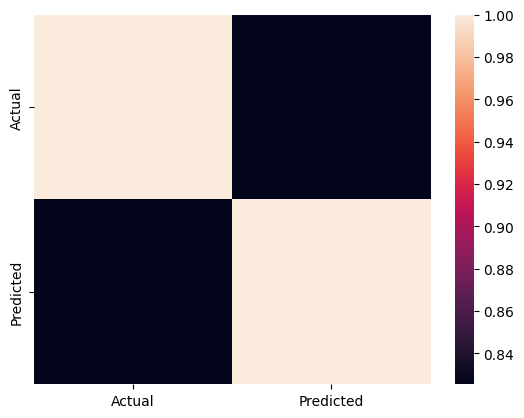

In [495]:
sns.heatmap(comparision.corr())

# **Metrics Evaluation using R2,Mean Squared Error,Root Mean Squared Error**

In [496]:
from sklearn.metrics import r2_score

In [497]:
r2_score(y_test,y_pred)


0.6812560999629242

In [498]:
from sklearn.metrics import mean_squared_error

In [499]:
MSE = mean_squared_error(y_test,y_pred)

In [500]:
MSE

9.123152535403534

In [501]:
RMSE=np.sqrt(MSE)

In [502]:
RMSE

3.0204556834033394

# **Random Forest Regression**

In [503]:
from sklearn.ensemble import RandomForestRegressor

In [504]:
rf=RandomForestRegressor(n_estimators=100) #here n_estimators means number of trees you want to build before making the prediction

In [505]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [506]:
y_pred=rf.predict(X_test)

In [507]:
y_pred

array([ 6.396, 21.79 ,  7.158, ..., 11.08 ,  7.335, 11.075])

# **Metrics Evaluation for Random Forest**

In [508]:
R2_Random = r2_score(y_test,y_pred)

In [509]:
R2_Random

0.820581352450316

In [510]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [511]:
MSE_Random

5.135356909108458

In [512]:
RMSE_Random = np.sqrt(MSE_Random)

In [513]:
RMSE_Random

2.2661325885985706

In [514]:
import pickle

In [515]:
filename = 'trained_model1.sav'
pickle.dump(rf, open(filename, 'wb'))

In [516]:
#Loading the model
loaded_model = pickle.load(open('trained_model1.sav', 'rb'))